1)Data Uploading: Load the dataset and
identify unique classes in the target
variable

In [30]:
import pandas as pd
# Load the dataset
file_path = 'winequality.csv'  # replace with your file path
dataset = pd.read_csv('/content/wine quality.csv')

In [31]:
# Display the first few rows of the dataset
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [32]:
# Identify unique classes in the target variable ('quality')
unique_classes = dataset['quality'].unique()
print("\nUnique classes in target variable 'quality':", unique_classes)


Unique classes in target variable 'quality': [5 6 7 4 8 3]


2) Data Visualization: Plot feature
distributions for pH, alcohol, and citric
acid.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

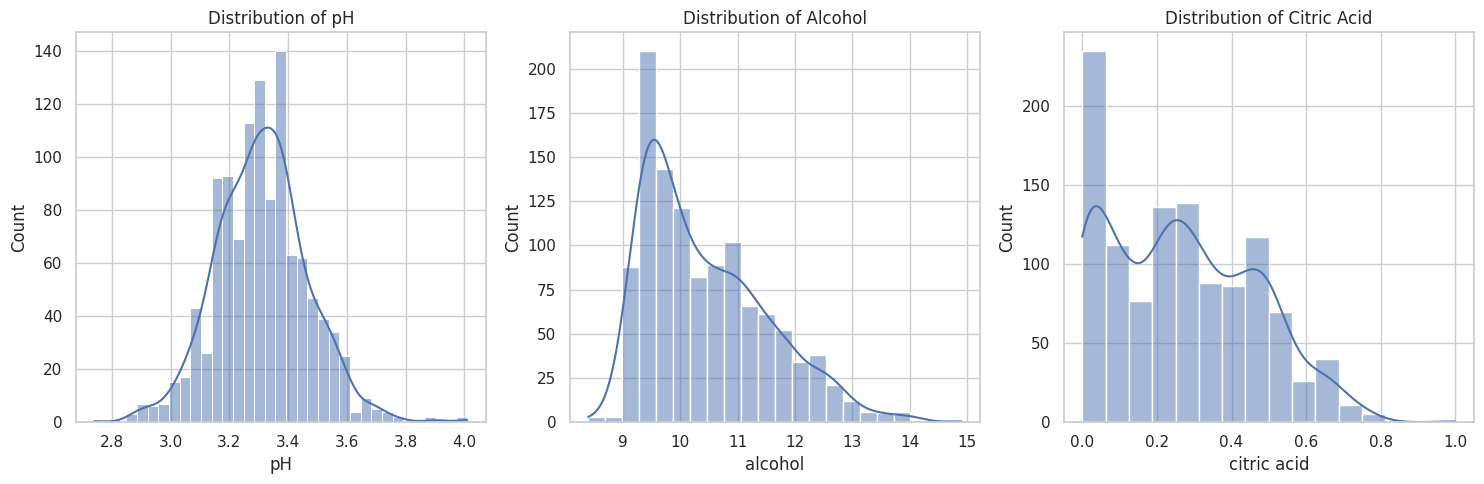

In [48]:
# Plot feature distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(dataset['pH'], kde=True)
plt.title('Distribution of pH')
plt.subplot(1, 3, 2)
sns.histplot(dataset['alcohol'], kde=True)
plt.title('Distribution of Alcohol')
plt.subplot(1, 3, 3)
sns.histplot(dataset['citric acid'], kde=True)
plt.title('Distribution of Citric Acid')
plt.tight_layout()
plt.show()

3)Data Analysis: Perform feature scaling
and discuss its impact on the model.

In [35]:
from sklearn.preprocessing import StandardScaler
# Select features for scaling
features = ['pH', 'alcohol', 'citric acid']
scaler = StandardScaler()

In [36]:
# Perform feature scaling
scaled_features = scaler.fit_transform(dataset[features])

In [37]:
# Convert scaled features back to DataFrame for inspection
scaled_df = pd.DataFrame(scaled_features, columns=features)
print("\nScaled features:")
print(scaled_df.head())


Scaled features:
         pH   alcohol  citric acid
0  1.270695 -0.963382    -1.365027
1 -0.708928 -0.593601    -1.365027
2 -0.325775 -0.593601    -1.161568
3 -0.964363 -0.593601     1.483400
4  1.270695 -0.963382    -1.365027


4)Handling Missing Values: Handle missing
data by removing rows with NaN values.

In [38]:
# Check for missing values
print("\nMissing values before handling:")
print(dataset.isnull().sum())


Missing values before handling:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [39]:
# Remove rows with NaN values
dataset_cleaned = dataset.dropna()

In [40]:
# Verify if missing values are handled
print("\nMissing values after handling:")
print(dataset_cleaned.isnull().sum())


Missing values after handling:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


5)Model Training and Evaluation: Train a
KNN classifier and evaluate using the
confusion matrix.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
# Features and target variable
X = dataset_cleaned[features]
y = dataset_cleaned['quality']

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [45]:
# Evaluate the model using the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[  0   5   4   0   0]
 [  1 105  37   0   0]
 [  1  60  76   9   0]
 [  0   6  21  14   0]
 [  0   0   3   1   0]]


In [46]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.60      0.73      0.66       143
           6       0.54      0.52      0.53       146
           7       0.58      0.34      0.43        41
           8       0.00      0.00      0.00         4

    accuracy                           0.57       343
   macro avg       0.34      0.32      0.32       343
weighted avg       0.55      0.57      0.55       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
